# Lyft and Uber cab fare prediction
-----------------------------------------------------------------

In this project, we are predicting the Lyft's and Uber's cab fares for future rides. We want to determine the price of the ride not just by distance but also by the weather conditions, time of day, and day if the week. 

Uber and Lyft, fortunately have a rich data set since there have been thousands of customers since both companies have started. This also means managing their data properly, enabling one to explore data to identify revelant data points, extract meaningful insights so that we can solve business problems such as this.

The goal of this predictive model is to generate a fare that improves customer trust and satisfaction without comprimising on comfort of the driver. Customer trust is the underlying goal since a trust-worthy company is more likely to be chosen than the competitors.

## Problem statement
____________________________________________________

The Uber/Lyft cab fare that is generated by the system takes only distance into consideration. However, the following problems are common while booking a cab:

1. Bad weather conditions
2. Bad Traffic conditions 
3. Cab is booked at an odd time (Ex. After mid night)
4. High demand of cab due to weekend or during peak hours

Since these factors are not taken into consideration, as a result:

1. Going to the pick up point can be an arduous process for the driver
2. Covering short distances can be tough
3. The cab driver needs to comprimise on sleep for duty
4. The customer is frustrated if the cab cancels in the last minute
5. Gas usage and expenditure are high

The customer is dissatisfied, the driver has extra expenditure and low income, and Uber's business is comprimised. 

#### This notebook explores various Machine Learning models that considers the above mentioned factors to predict a suitable fare.

## Plan of action:
____________________________________________________

STEP 1. Collecting the Raw Data and Data pre-processing
  
STEP 2. Exploratory Data Analysis - 
    
    EDA refers to the critical process of performing initial investigations on data to discover patterns, spot anomalies, test hypothesis, and to check assumptions with the help of summary statistics and graphical representations. Understand the data is powerful to gather insights from it. In short, EDA is all about making sense of data in hand.
    
STEP 3. Data Preparation -
    
    1. Label Encoding - 
    
    Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.
    
    2. Binning -
    
    Binning is the process of transforming numerical variables into categorical counterparts. Binning improves accuracy of the predictive models by reducing the noise or non-linearity in the dataset. Finally, binning lets easy identification of outliers, invalid and missing values of numerical variables.
    
STEP 4. Recursive Feature Elimination -
    
    RFE is a wrapper-type feature selection algorithm. The Machine Learning algorithm that used in the core of the method, is wrapped by RFE, which is used to help select features. This is in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score. 
    
    RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internally.
    
STEP 5. Feature Selection -

    A machine learning dataset for classification or regression is comprised of rows and columns, like an excel spreadsheet. 
     
    Rows are often referred to as samples and columns are referred to as features. Feature engineering is selecting and transforming a subset of the most relevant features (columns) for a dataset.
    
    Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Some machine learning algorithms can be misled by irrelevant input features, resulting in worse predictive performance.

STEP 6. Modelling and Testing-
    
    Training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data.
    
    We have explored 4 ML models, namely - 
    1. Linear Regression
    2. Random Forest
    3. Decision Tree
    4. Gradient Boosting Regressor
    
    Modelling:
    1. Fitting
    2. Accuracy score
    3. Hyper-parameter tuning
    
    Evaluation:
    
    1. Actual vs Predicted
    2. Cross-validation
    3. Performance Metric of each algorithm
    
STEP 7. Results

### Packages used

Pandas - to represent the raw data and give it some structure

Numpy - to perform all mathematical and scientific computations on the operations

Sklearn - to select efficient tools for the ML models like regression, fitting and predicting  

Matplotlib and seaborn - for data visualization and plotting graphs


### STEP 1 Collecting the raw data and data pre-processing
___________________________________

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [2]:
uber_dataset = pd.read_csv(r'rideshare_kaggle.csv')
print(uber_dataset.shape)

(693071, 57)


In [3]:
uber_dataset.shape

(693071, 57)

The data is the the form of an Excel spreadsheet and has 693071 rows and 57 columns. We are representing the data in the form of a dataframe called uber_dataset

In [4]:
uber_dataset.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


As shown above, the raw data is only structured at this point. There are various datatypes in a single dataset. 
1. The dataset needs be narrowed down to a single datatype
2. The date columns need to be modified
3. The null values need to be handled
4. Special characters need to be handled

In short, the purpose of cleaning the data is to make it more meaningful for the ML model

Shown below is the metadata, and the corresponding data types

In [5]:
uber_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

The describe() function computes a summary of statistics pertaining to the DataFrame columns. It defines the mean, std values.

In [6]:
uber_dataset.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Price has 55095 null values that need to be handled.

In [7]:
#Finding the null Values in In column
uber_dataset.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

### STEP 2 Exploratory Data Analysis
__________________________________________________


##### Distribution of Price based on cab type
1. The Black SUV and Lux Black XL have the maximum cab fares. 
2. Shared and UberPool are the least expensive.
3. The remaining cab types are have neither the highest nor the lowest cab fare.
4. Density of Ubers are more than Lyft.

Conclusions/Assumptions
1. Customers might use these Black SUV and Lux Black XL for long distances. 
2. The remaining cab types are mainly taken to travel within the city. 
3. Uber Pool might have been used for a longer distance than Shared.
4. Ubers are used more than Uber.

Text(0, 0.5, 'Cab type')

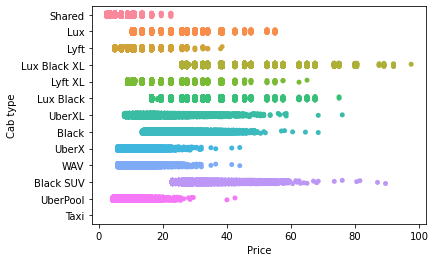

In [8]:
sns.stripplot(data=uber_dataset, x='price', y='name')
plt.xlabel('Price')
plt.ylabel('Cab type')

##### Distribution of price based on weather conditions
1. Price distribution is highest on a clear night than a clear day.
2. Price distribution is highest on cloudy days than rainy days.
3. Price distribution is lower on rainy and foggy days
4. The density is high upto 60 USD after which it is tapered.

Conclusions/Assumptions
1. Customers travel shorter distances on rainy or foggy days
2. Customers take cabs at night to travel long distances. The traffic is higher.
3. Customers travel within the city no matter the weather conditions.
4. Some customers travel long distances during cloudy days/nights or the wait time is higher

Text(0, 0.5, 'Weather Conditions')

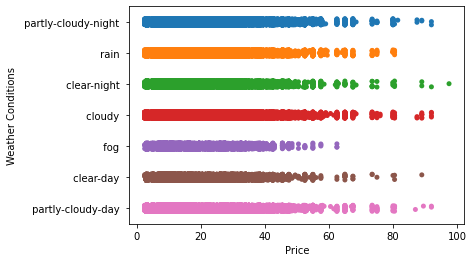

In [9]:
#strip plot to find the range of price based on weather conditiom 
sns.stripplot(data=uber_dataset, x='price', y='icon')
plt.xlabel('Price')
plt.ylabel('Weather Conditions')

##### Price ditribution with distance
The graph is not linear. Ideally, price should increase with distance, but in this case it does not. We assume that due to heavy traffic or bad weather, the wait time is higher and that increases the fares.

Text(0, 0.5, 'distance')

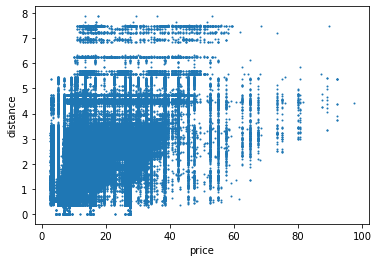

In [10]:
x=np.array(uber_dataset['price'])
y=np.array(uber_dataset['distance'])
plt.scatter(x,y,s=1)
plt.xlabel('price')
plt.ylabel('distance')

##### Hour vs Price
1. Cabs run at all hours of the day with equal density
2. The highest cab fare was at 1 AM
3. Higher cab fares are noticed between 8PM AND 8AM, with lower density

Text(0, 0.5, 'price')

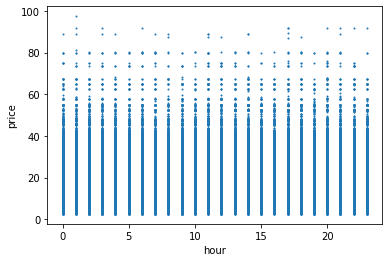

In [11]:
x=np.array(uber_dataset['hour'])
y=np.array(uber_dataset['price'])
plt.scatter(x,y,s=1)
plt.xlabel('hour')
plt.ylabel('price')

Handling DateTime Columns

In [12]:
uber_dataset['timestamp'].head()

0    1.544953e+09
1    1.543284e+09
2    1.543367e+09
3    1.543554e+09
4    1.543463e+09
Name: timestamp, dtype: float64

In [13]:
from datetime import datetime
timestamp1 = 1544952608
timestamp2 = 1543284024
timestamp3 = 1543818483
timestamp4 = 1543594384
timestamp5 = 1544728504
dt_object1 = datetime.fromtimestamp(timestamp1)
dt_object2 = datetime.fromtimestamp(timestamp2)
dt_object3 = datetime.fromtimestamp(timestamp3)
dt_object4 = datetime.fromtimestamp(timestamp4)
dt_object5 = datetime.fromtimestamp(timestamp5)

print("dt_object =", dt_object1)
print("dt_object =", dt_object2)
print("dt_object =", dt_object3)
print("dt_object =", dt_object4)
print("dt_object =", dt_object5)

dt_object = 2018-12-16 04:30:08
dt_object = 2018-11-26 21:00:24
dt_object = 2018-12-03 01:28:03
dt_object = 2018-11-30 11:13:04
dt_object = 2018-12-13 14:15:04


It is observed that this data consists of total rides in November and December. There were more rides in December, probably due to the holiday season.

Text(0, 0.5, 'Total count')

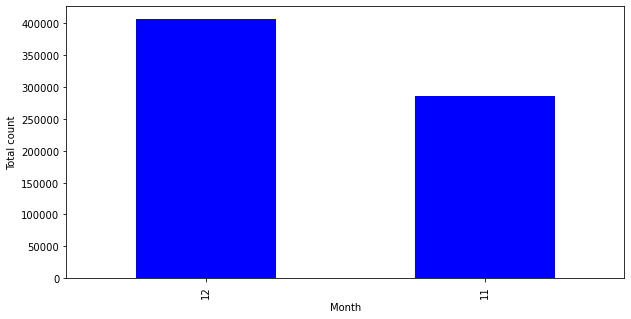

In [14]:
uber_dataset['month'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')
plt.xlabel("Month")
plt.ylabel("Total count")

##### Number of people who take cabs from each location
Equal number of people take cabs from each source and destination

Text(0, 0.5, 'Total count')

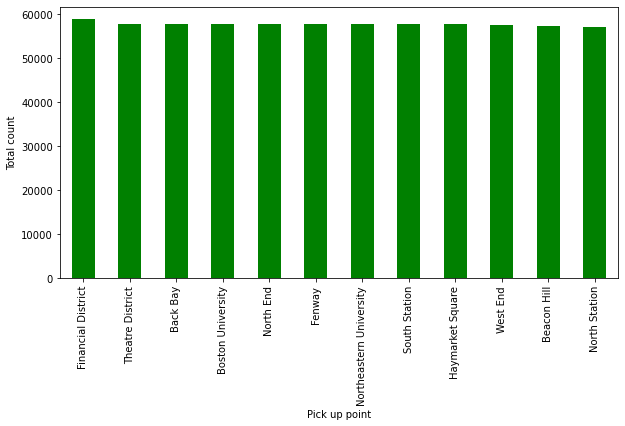

In [15]:
uber_dataset['source'].value_counts().plot(kind='bar', figsize=(10,5), color='green')
plt.xlabel("Pick up point")
plt.ylabel("Total count")

Text(0, 0.5, 'Total count')

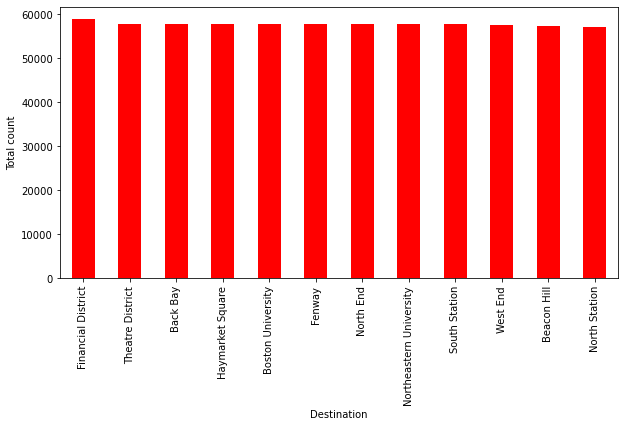

In [16]:
uber_dataset['destination'].value_counts().plot(kind='bar', figsize=(10,5), color='red')
plt.xlabel("Destination")
plt.ylabel("Total count")

##### Uber vs Number of customers
More number of people take Ubers than Lyfts. There is nore trust in Uber, probably because Lyft is relatively newer to the market.

Text(0, 0.5, 'Total count')

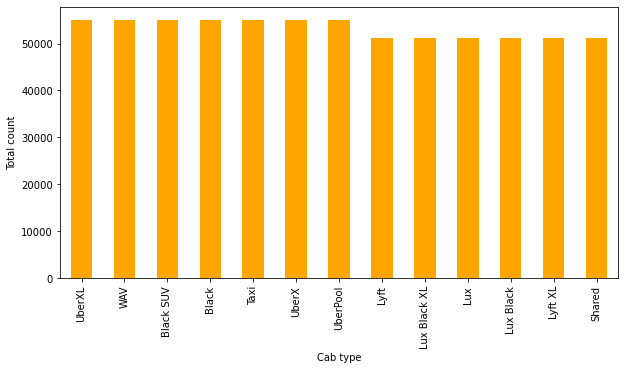

In [17]:
uber_dataset['name'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')
plt.xlabel("Cab type")
plt.ylabel("Total count")

##### Weather conditions vs Customer Count
People take most cabs on cloudy days than rainy days.
1. November and December are cloudy most of the days
2. Customers take cabs mostly on cloudy days than any other day

Text(0, 0.5, 'Total count')

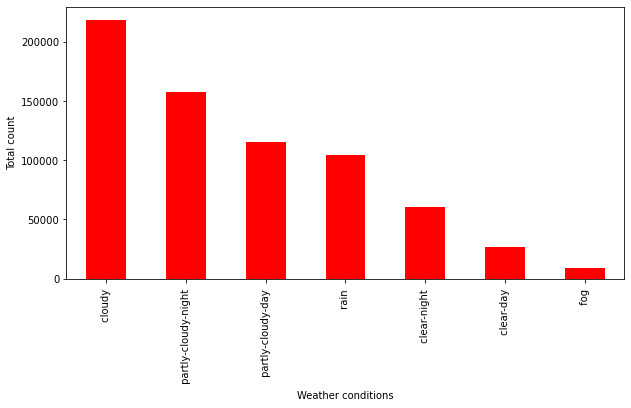

In [18]:
uber_dataset['icon'].value_counts().plot(kind='bar', figsize=(10,5), color='red')
plt.xlabel("Weather conditions")
plt.ylabel("Total count")

##### Number of customers per weekday
Monday and Tuesday have the highest number of customers

In [19]:
uber_dataset['day-of-week'] = pd.to_datetime(uber_dataset['datetime']).dt.day_name()

Text(0, 0.5, 'Number of customers')

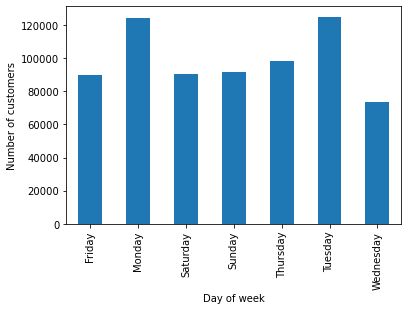

In [20]:
uber_dataset.groupby('day-of-week')['id'].count().plot(kind='bar')
plt.xlabel('Day of week')
plt.ylabel('Number of customers')

### STEP 3 Data Preparation
-----------------------------------------------------

### Label Encoding

In [21]:
# label_encoder object knows how to understand word labels. 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

Below are the data types of each attribute before Label Encoding. The ML models are mathematical and cannot take string directly. We assign a number to each attribute so that the whole dataset is encoded and the ML model can form a mathematical correlation amongst the attributes.

In [22]:
uber_dataset.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

Encoding all the columns

In [23]:
uber_dataset['id']= label_encoder.fit_transform(uber_dataset['id']) 
uber_dataset['datetime']= label_encoder.fit_transform(uber_dataset['datetime']) 
uber_dataset['timezone']= label_encoder.fit_transform(uber_dataset['timezone'])
uber_dataset['destination']= label_encoder.fit_transform(uber_dataset['destination']) 
uber_dataset['product_id']= label_encoder.fit_transform(uber_dataset['product_id'])
uber_dataset['short_summary']= label_encoder.fit_transform(uber_dataset['short_summary'])
uber_dataset['long_summary']= label_encoder.fit_transform(uber_dataset['long_summary'])
uber_dataset['day-of-week']= label_encoder.fit_transform(uber_dataset['day-of-week'])

In [24]:
uber_dataset['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

In [25]:
uber_dataset['cab_type']= label_encoder.fit_transform(uber_dataset['cab_type'])

print("Class mapping of cab_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of cab_type: 
Lyft --> 0
Uber --> 1


In [26]:
uber_dataset['name']= label_encoder.fit_transform(uber_dataset['name'])

print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
Taxi --> 8
UberPool --> 9
UberX --> 10
UberXL --> 11
WAV --> 12


In [27]:
uber_dataset['source']= label_encoder.fit_transform(uber_dataset['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [28]:
uber_dataset['icon']= label_encoder.fit_transform(uber_dataset['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


All the encoded columns have changed to int datatype. All those columns are encoded and can be fed into ML models

In [29]:
# checking the data type after label encoding
uber_dataset.dtypes

id                               int32
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                         int32
timezone                         int32
source                           int32
destination                      int32
cab_type                         int32
product_id                       int32
name                             int32
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                    int32
long_summary                     int32
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [30]:
uber_dataset.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,day-of-week
0,179271,1.544953e+09,9,16,12,25351,0,5,7,0,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,3
1,205021,1.543284e+09,2,27,11,961,0,5,7,0,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,5
2,411506,1.543367e+09,1,28,11,2534,0,5,7,0,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,6
3,527263,1.543554e+09,4,30,11,6988,0,5,7,0,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,0
4,606526,1.543463e+09,3,29,11,4400,0,5,7,0,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,4


### Binning

We are classifying the values of the surge multiplier into 5 buckets numbered from 0 to 4.

Surge multiplier is the value determined by the wait time of the cab - wether in traffic or before pick up - multiplied to the actual price of the cab fare. This is an indirect representation of the wait time.

In [31]:
uber_dataset['surge_multiplier'].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

In [32]:
surge_multiplier_mapping = {1.: 0, 1.25: 1, 1.5: 2, 1.75: 3, 2.:4, 2.5:5, 3.:6}
uber_dataset['surge_multiplier'] = uber_dataset['surge_multiplier'].map(surge_multiplier_mapping)

In the next 3 cells we find NAN values in the dataset and replace them with the median value as standard practice Data Science practice.

In [33]:
uber_dataset.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [34]:
uber_dataset['price'].median()

13.5

In [35]:
uber_dataset["price"].fillna(13.5, inplace = True) 

In [36]:
uber_dataset.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [37]:
uber_dataset['price'].dtype

dtype('float64')

In [38]:
uber_dataset['price'] = uber_dataset['price'].astype(int)

In [39]:
uber_dataset['price'].head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

### STEP 4 RFE (Recursive Feature Elimination)

Our goal here is to find a correlation amongst the attributes of the dataset. Since we want to predict the price of the cab fare, we need to find a correlation between the price and the remaining attributes like weather conditions, time of day etc.

So we assign price to the y which is the dependent variable, and the influencing attributes to X. 

Mathematically, an algebriac equation can be defined between X and y, based on the reccurring patterns of the encoded values.

In [40]:
X = uber_dataset.drop('price', axis = 1)
y = uber_dataset['price']

In [41]:
X.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,day-of-week
0,179271,1.544953e+09,9,16,12,25351,0,5,7,0,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,3
1,205021,1.543284e+09,2,27,11,961,0,5,7,0,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,5
2,411506,1.543367e+09,1,28,11,2534,0,5,7,0,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,6
3,527263,1.543554e+09,4,30,11,6988,0,5,7,0,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,0
4,606526,1.543463e+09,3,29,11,4400,0,5,7,0,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,4


In [42]:
y.head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

In [43]:
X.shape

(693071, 57)

In [44]:
y.shape

(693071,)

The below graph shows the frequency of the price in November and December. 13 USD is the most frequent cab fare and 97 USD is the least frequent cab fare.

Text(0, 0.5, 'Total count')

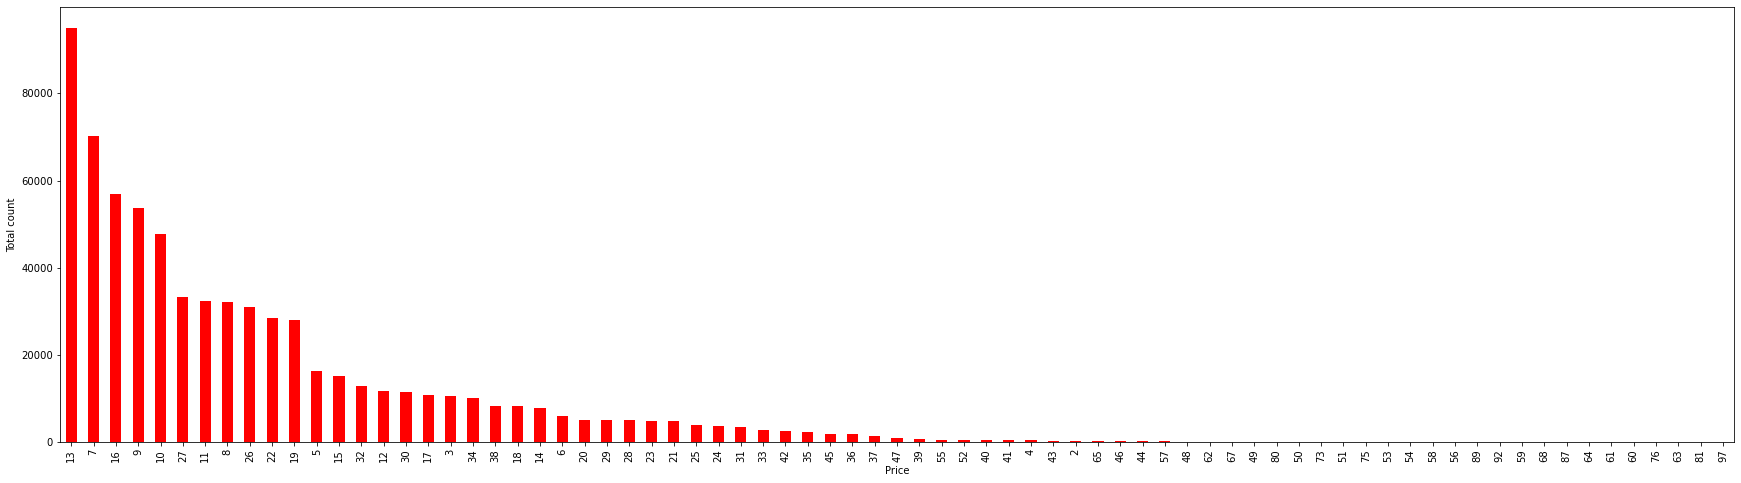

In [45]:
y.value_counts().plot(kind='bar',figsize=(30,8),color='red')
plt.xlabel("Price")
plt.ylabel("Total count")

#### Splitting the data set into training set and test set for training and validation of the ML Models

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
X_train.shape

(554456, 57)

In [48]:
X_test.shape

(138615, 57)

In [49]:
y_train.shape

(554456,)

In [50]:
y_test.shape

(138615,)

##### Understanding the influence of each feature on price

Since this is a regression model, to determine the importance of each feature, the model assigns a coefficient as the score. Below is the assigned score for each feature:

In [51]:
#Creating model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X_train, y_train)

Feature: 0, Score: 0.00000
Feature: 1, Score: -0.00001
Feature: 2, Score: 0.01936
Feature: 3, Score: 0.45864
Feature: 4, Score: 13.84267
Feature: 5, Score: 0.00001
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.03336
Feature: 8, Score: 0.00898
Feature: 9, Score: 7.57630
Feature: 10, Score: 0.68070
Feature: 11, Score: -1.58560
Feature: 12, Score: 2.55669
Feature: 13, Score: 5.13461
Feature: 14, Score: 1.00017
Feature: 15, Score: 1.15865
Feature: 16, Score: -0.01015
Feature: 17, Score: 0.00302
Feature: 18, Score: -0.00593
Feature: 19, Score: -0.01370
Feature: 20, Score: -0.44246
Feature: 21, Score: -0.01040
Feature: 22, Score: -0.15044
Feature: 23, Score: -0.00884
Feature: 24, Score: 0.00533
Feature: 25, Score: 0.00000
Feature: 26, Score: -0.00155
Feature: 27, Score: -0.17282
Feature: 28, Score: 0.00000
Feature: 29, Score: -0.03111
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.09782
Feature: 32, Score: -0.00000
Feature: 33, Score: 0.02252
Feature: 34, Score: -0.00000
Feature: 35, S

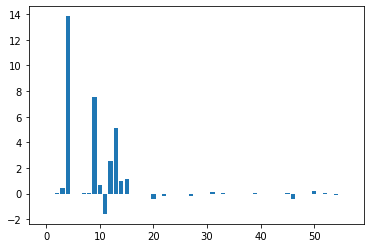

In [52]:
importance = reg.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The important features have the maximum score as listed below:

	Feature: 3, Score: 0.45864
	Feature: 4, Score: 13.84267
	Feature: 7, Score: 0.03336
	Feature: 9, Score: 7.57630
	Feature: 10, Score: 0.68070
	Feature: 12, Score: 2.55669
	Feature: 13, Score: 5.13461
	Feature: 14, Score: 1.00017
	Feature: 15, Score: 1.15865
	Feature: 35, Score: 0.00632
	Feature: 50, Score: 0.18028
	Feature: 52, Score: 0.01865
	Feature: 56, Score: 0.00481

In [53]:
print(X.columns[3])
print(X.columns[4])
print(X.columns[7])
print(X.columns[9])
print(X.columns[10])
print(X.columns[12])
print(X.columns[13])
print(X.columns[14])
print(X.columns[15])
print(X.columns[35])
print(X.columns[50])
print(X.columns[56])

day
month
source
cab_type
product_id
distance
surge_multiplier
latitude
longitude
icon
temperatureMax
day-of-week


#### Testing the training accuracy with all 56 features

In [55]:
rfe = RFE(reg,n_features_to_select=56, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 57 features.


In [56]:
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [57]:
XX = X[X.columns[rfe.support_]]

In [58]:
XX.head()

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,day-of-week
0,1.544953e+09,9,16,12,25351,0,5,7,0,8,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,3
1,1.543284e+09,2,27,11,961,0,5,7,0,12,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,5
2,1.543367e+09,1,28,11,2534,0,5,7,0,7,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,6
3,1.543554e+09,4,30,11,6988,0,5,7,0,10,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,0
4,1.543463e+09,3,29,11,4400,0,5,7,0,11,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,4


In [59]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10)

In [60]:
X_train.shape

(485149, 56)

In [61]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [62]:
reg1.score(X_train, y_train)

0.5264086757714671

#### Testing the training accuracy with 40 features

In [63]:
rfe = RFE(reg,n_features_to_select= 40,step=1)
rfe = rfe.fit(X, y)

In [64]:
rfe.support_

array([False, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
        True,  True, False,  True, False,  True, False,  True, False,
        True, False,  True])

In [65]:
XX = X[X.columns[rfe.support_]]

In [66]:
#Final Dateset after preprocessing 
XX.head()

,hour,day,month,source,destination,cab_type,product_id,name,distance,surge_multiplier,...,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,day-of-week
0,9,16,12,5,7,0,8,7,0.44,0,...,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07,3
1,2,27,11,5,7,0,12,2,0.44,0,...,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92,5
2,1,28,11,5,7,0,7,5,0.44,0,...,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12,6
3,4,30,11,5,7,0,10,4,0.44,0,...,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53,0
4,3,29,11,5,7,0,11,6,0.44,0,...,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75,4


In [67]:
#Splitting the final data set into test and train
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10)

In [68]:
X_train.shape

(485149, 40)

In [69]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [70]:
reg1.score(X_train, y_train)

0.5264022449568695

#### Testing the training accuracy with 15 features

In [71]:
rfe = RFE(reg,n_features_to_select=15, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 fe

In [72]:
XX = X[X.columns[rfe.support_]]

In [73]:
XX.head()

,source,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,precipIntensity,humidity,temperatureHigh,apparentTemperatureHigh,dewPoint,temperatureMax,apparentTemperatureMax
0,5,0,8,7,0.44,0,42.2148,-71.033,0.0000,0.68,43.68,37.95,32.70,43.68,38.07
1,5,0,12,2,0.44,0,42.2148,-71.033,0.1299,0.94,47.30,43.92,41.83,47.30,43.92
2,5,0,7,5,0.44,0,42.2148,-71.033,0.0000,0.75,47.55,44.12,31.10,47.55,44.12
3,5,0,10,4,0.44,0,42.2148,-71.033,0.0000,0.73,45.03,38.53,26.64,45.03,38.53
4,5,0,11,6,0.44,0,42.2148,-71.033,0.0000,0.70,42.18,35.75,28.61,42.18,35.75


In [74]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10,)

In [75]:
X_train.shape

(485149, 15)

In [76]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [77]:
reg1.score(X_train, y_train)

0.526375236736347

#### Testing the training accuracy with 25 features

In [78]:
rfe = RFE(reg, n_features_to_select=25, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 fe

In [79]:
XX = X[X.columns[rfe.support_]]

In [80]:
XX.head()

,month,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,...,temperatureLow,apparentTemperatureHigh,dewPoint,cloudCover,uvIndex,moonPhase,precipIntensityMax,temperatureMax,apparentTemperatureMax,day-of-week
0,12,5,7,0,8,7,0.44,0,42.2148,-71.033,...,34.19,37.95,32.70,0.72,0,0.30,0.1276,43.68,38.07,3
1,11,5,7,0,12,2,0.44,0,42.2148,-71.033,...,42.10,43.92,41.83,1.00,0,0.64,0.1300,47.30,43.92,5
2,11,5,7,0,7,5,0.44,0,42.2148,-71.033,...,33.10,44.12,31.10,0.03,0,0.68,0.1064,47.55,44.12,6
3,11,5,7,0,10,4,0.44,0,42.2148,-71.033,...,28.90,38.53,26.64,0.00,0,0.75,0.0000,45.03,38.53,0
4,11,5,7,0,11,6,0.44,0,42.2148,-71.033,...,36.71,35.75,28.61,0.44,0,0.72,0.0001,42.18,35.75,4


In [81]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 20,)

In [82]:
X_train.shape

(485149, 25)

In [83]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)
#Y prediction
Y_pred = reg1.predict(X_test)

In [84]:
reg1.score(X_train, y_train)

0.5262112568701127

#### Columns After RFE

In [85]:
XX.columns

Index(['month', 'source', 'destination', 'cab_type', 'product_id', 'name',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'precipIntensity', 'precipProbability', 'humidity', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'dewPoint', 'cloudCover',
       'uvIndex', 'moonPhase', 'precipIntensityMax', 'temperatureMax',
       'apparentTemperatureMax', 'day-of-week'],
      dtype='object')

In [86]:
XX.shape

(693071, 25)

In [87]:
XX.head()

,month,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,...,temperatureLow,apparentTemperatureHigh,dewPoint,cloudCover,uvIndex,moonPhase,precipIntensityMax,temperatureMax,apparentTemperatureMax,day-of-week
0,12,5,7,0,8,7,0.44,0,42.2148,-71.033,...,34.19,37.95,32.70,0.72,0,0.30,0.1276,43.68,38.07,3
1,11,5,7,0,12,2,0.44,0,42.2148,-71.033,...,42.10,43.92,41.83,1.00,0,0.64,0.1300,47.30,43.92,5
2,11,5,7,0,7,5,0.44,0,42.2148,-71.033,...,33.10,44.12,31.10,0.03,0,0.68,0.1064,47.55,44.12,6
3,11,5,7,0,10,4,0.44,0,42.2148,-71.033,...,28.90,38.53,26.64,0.00,0,0.75,0.0000,45.03,38.53,0
4,11,5,7,0,11,6,0.44,0,42.2148,-71.033,...,36.71,35.75,28.61,0.44,0,0.72,0.0001,42.18,35.75,4


### STEP 6 Feature Selection

In [88]:
features_drop = ['precipIntensity', 'precipProbability', 'humidity', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'dewPoint','cloudCover',
       'uvIndex', 'moonPhase', 'precipIntensityMax', 'temperatureMax',
       'apparentTemperatureMax']
new_uber = XX.drop(features_drop, axis=1)

In [89]:
new_uber.head()

,month,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,day-of-week
0,12,5,7,0,8,7,0.44,0,42.2148,-71.033,42.34,3
1,11,5,7,0,12,2,0.44,0,42.2148,-71.033,43.58,5
2,11,5,7,0,7,5,0.44,0,42.2148,-71.033,38.33,6
3,11,5,7,0,10,4,0.44,0,42.2148,-71.033,34.38,0
4,11,5,7,0,11,6,0.44,0,42.2148,-71.033,37.44,4


#### Final Dataset

In [90]:
new_uber.head()

,month,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,day-of-week
0,12,5,7,0,8,7,0.44,0,42.2148,-71.033,42.34,3
1,11,5,7,0,12,2,0.44,0,42.2148,-71.033,43.58,5
2,11,5,7,0,7,5,0.44,0,42.2148,-71.033,38.33,6
3,11,5,7,0,10,4,0.44,0,42.2148,-71.033,34.38,0
4,11,5,7,0,11,6,0.44,0,42.2148,-71.033,37.44,4


In [91]:
new_uber.fillna(0, inplace=True)

In [92]:
y.head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

## STEP 7 Modelling and Testing
-----------------------------------------------------

In [93]:
new_uber.shape

(693071, 12)

In [94]:
y.shape

(693071,)

In [95]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xx_train, xx_test, yy_train, yy_test = train_test_split(new_uber, y, test_size = 0.2, random_state = 42)

In [96]:
xx_train.shape

(554456, 12)

In [97]:
xx_test.shape

(138615, 12)

In [98]:
yy_train.shape

(554456,)

In [99]:
yy_test.shape

(138615,)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

In [101]:
new_uber.fillna(X_train.mean(), inplace=True)

### Linear regression

In [102]:
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

In [103]:
linear = LinearRegression(fit_intercept=True, normalize=False,copy_X=True, n_jobs=None)

1. Fitting

In [104]:
linear.fit(xx_train, yy_train)

C:\Users\aleky\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

2. Scoring

In [105]:
print('linear_score : ',linear.score(xx_test, yy_test))
linear_score=linear.score(xx_test, yy_test)

linear_score :  0.524991139837458


#### Testing Linear Regression

In [106]:
prediction = linear.predict(xx_test)
prediction=  prediction.astype(int)

1. Actual vs Prediction

Text(0, 0.5, 'Predicted Y')

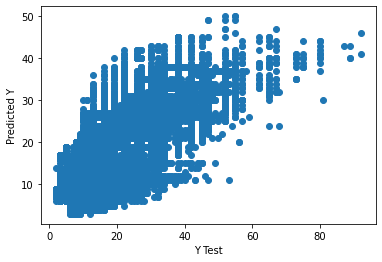

In [107]:
plt.scatter(yy_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

2. Performance metric of the Linear Regression Model- 

In [108]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   4.786826822493958
MSE :   38.45552068679436
RMAE :   6.20125154197073


In [109]:
linear_score=linear.score(xx_test, yy_test)
linear_MAE=metrics.mean_absolute_error(yy_test,prediction)
linear_MSE= metrics.mean_squared_error(yy_test,prediction)
linear_RMAE=np.sqrt(metrics.mean_squared_error(yy_test,prediction))

C:\Users\aleky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

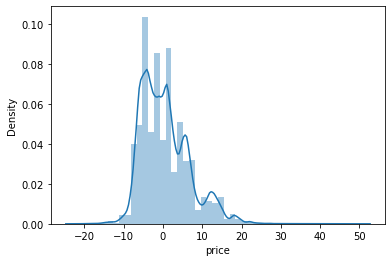

In [110]:
sns.distplot(yy_test - prediction,bins=50)

3. K Cross-validation

In [111]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),xx_test,yy_test,cv=cv)

array([0.52811237, 0.52820122, 0.52443133, 0.52229772, 0.52062121])

Conclusion -

Linear regression is not a good model for this data since this data is not linear. This data is too complex for a linear model.

The remaining ML Models are more robust for this data. These models learns the variety of data better.

### Decision Tree

1. Hyper performance tuning

In [112]:
decision = DecisionTreeRegressor(random_state = 0, max_depth=12)

2. Fitting

In [113]:
decision.fit(xx_train , yy_train)

DecisionTreeRegressor(max_depth=12, random_state=0)

3. Scoring

In [114]:
print('Decision_tree_score :',decision.score(xx_test, yy_test))

Decision_tree_score : 0.9653157576824608


#### Testing decision tree

1. Actual vs Predicted values

In [115]:
prediction=decision.predict(xx_test)

Text(0, 0.5, 'Predicted Y')

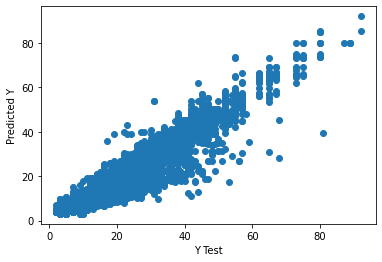

In [116]:
plt.scatter(yy_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

2. Performance metric of the Decision tree model

In [117]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   1.0152969951588586
MSE :   2.782758670025286
RMAE :   1.668160265090044


In [118]:
decision_score=decision.score(xx_test, yy_test)
decision_MAE=metrics.mean_absolute_error(yy_test,prediction)
decision_MSE= metrics.mean_squared_error(yy_test,prediction)
decision_RMAE=np.sqrt(metrics.mean_squared_error(yy_test,prediction))

C:\Users\aleky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

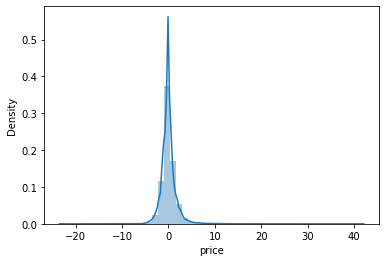

In [119]:
sns.distplot(yy_test - prediction,bins=50)

3. K Cross-validation for decision tree

In [120]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(DecisionTreeRegressor(),xx_test,yy_test,cv=cv)

array([0.9296799 , 0.93448549, 0.93516931, 0.93245201, 0.93037101])

### Random Forest

1. Hyper performance tuning

In [121]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(xx_train, yy_train)

##print(g_search.best_params_)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True)

In [122]:
random = RandomForestRegressor(n_estimators = 100, random_state = 0) 

2. Fitting

In [123]:
random.fit(xx_train , yy_train)

RandomForestRegressor(random_state=0)

3. Scoring

In [124]:
print('Random_forest_score :',random.score(xx_test, yy_test))
random_score=random.score(xx_test, yy_test)

Random_forest_score : 0.9615018326116405


#### Testing the Random Forest Model

1. Actual vs Predicted

In [125]:
prediction = random.predict(xx_test)

C:\Users\aleky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Y')

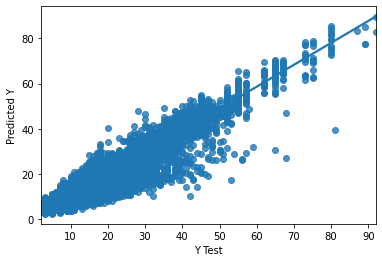

In [126]:
sns.regplot(yy_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

2. Performance metric of Random Forest Model

In [127]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   1.0577620583285825
MSE :   3.0887544868139742
RMAE :   1.7574852735695894


In [128]:
random_score=random.score(xx_test, yy_test)
random_MAE=metrics.mean_absolute_error(yy_test,prediction)
random_MSE=metrics.mean_squared_error(yy_test,prediction)
random_RMAE=np.sqrt(metrics.mean_squared_error(yy_test,prediction))

C:\Users\aleky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

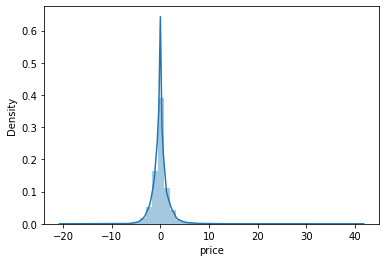

In [129]:
sns.distplot(yy_test - prediction,bins=50)

3. K Cross-validation

In [130]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(RandomForestRegressor(),xx_test,yy_test,cv=cv)

array([0.95889066, 0.96163704, 0.96230462, 0.96176672, 0.95861006])

### Gradient Boosting Regressor

1. Hyper performance tuning

In [131]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5)

2. Fitting

In [132]:
clf.fit(xx_train, yy_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

3. Scoring

In [133]:
print('Grdient_Boosting_Regressor_score :',clf.score(xx_test, yy_test))

Grdient_Boosting_Regressor_score : 0.9678644183603102


#### Testing the Gradient Booster Model

1. Actual vs Predicted

In [134]:
prediction=clf.predict(xx_test)

Text(0, 0.5, 'Predicted Y')

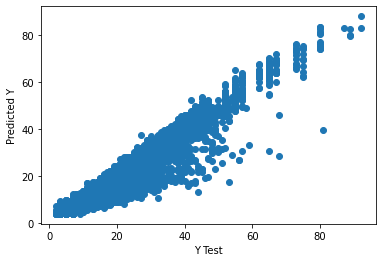

In [135]:
plt.scatter(yy_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

2. Performace metric of Gradient Boosting Model

In [136]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   1.0128262051283472
MSE :   2.5782765443006754
RMAE :   1.6057012624709104


In [137]:
Gradient_score=clf.score(xx_test, yy_test)
Gradient_MAE=metrics.mean_absolute_error(yy_test,prediction)
Gradient_MSE=metrics.mean_squared_error(yy_test,prediction)
Gradient_RMAE=np.sqrt(metrics.mean_squared_error(yy_test,prediction))

C:\Users\aleky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

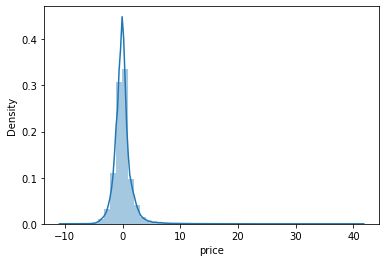

In [138]:
sns.distplot(yy_test - prediction,bins=50)

3. K Cross-validation

In [139]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(clf,xx_test,yy_test,cv=cv)

array([0.96531431, 0.96770392, 0.96781916, 0.96714924, 0.9651083 ])

#### Price prediction function

In [140]:
new_uber.head()

,month,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,day-of-week
0,12,5,7,0,8,7,0.44,0,42.2148,-71.033,42.34,3
1,11,5,7,0,12,2,0.44,0,42.2148,-71.033,43.58,5
2,11,5,7,0,7,5,0.44,0,42.2148,-71.033,38.33,6
3,11,5,7,0,10,4,0.44,0,42.2148,-71.033,34.38,0
4,11,5,7,0,11,6,0.44,0,42.2148,-71.033,37.44,4


In [141]:
def predict_price(name,source,surge_multiplier,icon):    
    loc_index = np.where(new_uber.columns==name)[0]

    x = np.zeros(len(new_uber.columns))
    x[0] = source
    x[1] = surge_multiplier
    x[2] = icon
    if loc_index >= 0:
        x[loc_index] = 1

    return random.predict([x])[0]

In [142]:
pre= random.predict(xx_test)

####  Follow  these instructions before predicting the price:

-  **For cab_name**: Black SUV --> 0 , Lux --> 1 , Shared --> 2 , Taxi --> 3 , UberPool --> 4 , UberX --> 5


- **For Source**: Back Bay --> 0 , Beacon Hill --> 1 , Boston University --> 2 , Fenway --> 3 , Financial District --> 4 , Haymarket Square --> 5 , North End --> 6 , North Station --> 7 , Northeastern University --> 8 , South Station --> 9 , Theatre District --> 10 , West End --> 11


- **For Surge_multiplier** : Enter Surge Multiplier value from 0 to 4


- **for Icon**:  clear-day  --> 0 , clear-night  --> 1 , cloudy  --> 2 , fog  --> 3 , partly-cloudy-day  --> 4 , partly-cloudy-night  --> 5 , rain  --> 6


**predict_price(cab_name , source , surge_multiplier , icon)**

In [143]:
predict_price(2 , 3, 2, 5)

<ipython-input-141-884828bfaf47>:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index >= 0:
C:\Users\aleky\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


15.118


# Result Metrics

Text(0.5, 0, 'algorithm')

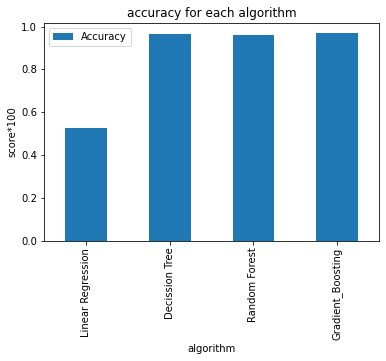

In [144]:
l1=['Linear Regression',linear_score]
l2=['Decission Tree',decision_score]
l3=['Random Forest',random_score]
l4=['Gradient_Boosting',Gradient_score]
cols=['Algo','Accuracy']
df= pd.DataFrame([list(l1),list(l2),list(l3),list(l4)],columns=cols)
df.set_index('Algo').plot(kind='bar')
plt.title("accuracy for each algorithm")
plt.ylabel("score*100")
plt.xlabel("algorithm")

In [145]:
l1=['Linear Regression',linear_MAE,linear_MSE,linear_RMAE]
l2=['Decission Tree',decision_MAE,decision_MSE,decision_RMAE]
l3=['Random Forest',random_MAE,random_MSE,random_RMAE]
l4=['Gradient_Boosting',Gradient_MAE,Gradient_MSE,Gradient_RMAE]
cols=['Algo','MAE','MSE','RMAE']

In [146]:
df= pd.DataFrame([list(l1),list(l2),list(l3),list(l4)],columns=cols)


In [147]:
df

,Algo,MAE,MSE,RMAE
0,Linear Regression,4.786827,38.455521,6.201252
1,Decission Tree,1.015297,2.782759,1.668160
2,Random Forest,1.057762,3.088754,1.757485
3,Gradient_Boosting,1.012826,2.578277,1.605701


Text(0, 0.5, 'algorithm')

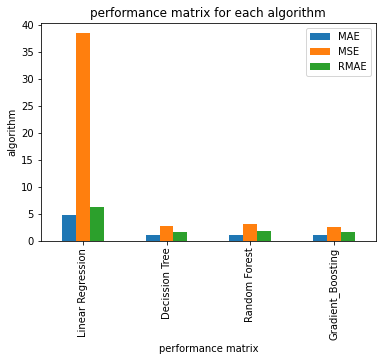

In [148]:
df.set_index('Algo').plot(kind='bar')
plt.title("performance matrix for each algorithm")
plt.xlabel("performance matrix")
plt.ylabel("algorithm")

The attributes on the left side that is red color coded has more impact on the price than the blue portion. That is, surge multiplier, product ID, Name and distance.

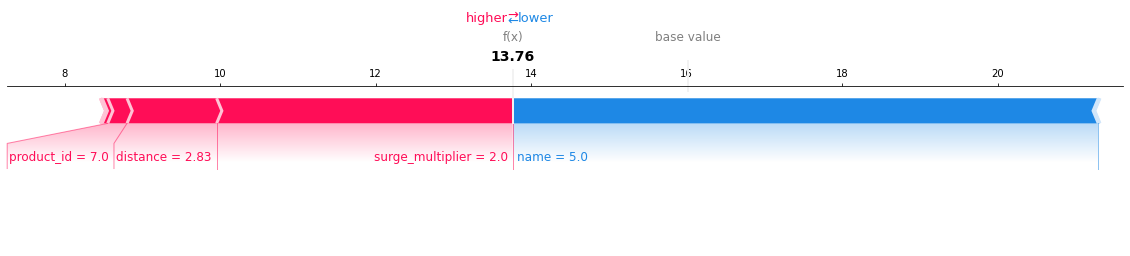

In [149]:
import shap
explainer=shap.TreeExplainer(decision)
shap_values = explainer.shap_values(X_test)
shap_plot = shap.force_plot(explainer.expected_value, 
    shap_values[-1:], features=X_test.iloc[-1:], 
    feature_names=X_test.columns[0:20],
    matplotlib=True, show=False, plot_cmap=['#77dd77', '#f99191'])